### 한국에서 코로나 바이러스에 감염된 사람들 데이터셋 처리

 - 비교적 최신 데이터  

 - csv 파일 형식  
 
 - column 항목  
 
 > 0. id: 확진자 id  
 > 1. global_num: n번째 확진자  
 > 2. sex: 성별  
 > 3. birth_year: 출생 연도  
 > 4. age: 나이  
 > 5. country: 국적  
 > 6. province: 방문지  
 > 7. city: 발생 도시  
 > 8. disease: 기저 질환  
 > 9. infection_case: 감염 종류  
 > 10. infection_order: 감염 차수 (n차 감염)  
 > 11. infected_by: 해당 확진자의 감염원 id  
 > 12. contact_number: 접촉자 수  
 > 13. symptom_onset_date: 증상 발현일  
 > 14. confirmed_date: 확진 일자  
 > 15. released_date: 퇴원 일자 (격리 해제 일자)
 > 16. deceased_date: 사망 일자
 > 17. state: 상태

In [1]:
# draw charts
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

In [23]:
# CSV 파일 읽어들이기

import csv  # csv 모듈 임포트
import pprint

# 파일 위치, 경로 정의
file_path = 'data/PatientInfo.csv'

# patient.csv 파일 열기
with open(file_path) as file:
    reader = csv.reader(file)  # CSV 파일을 읽어들이는 읽기 객체
    raw = list(reader)      #  CSV 파일 내용을 리스트로 읽어들인다

pprint.pprint(raw[:3])  # 읽어들인 내용을 화면에 출력

[['patient_id',
  'global_num',
  'sex',
  'birth_year',
  'age',
  'country',
  'province',
  'city',
  'disease',
  'infection_case',
  'infection_order',
  'infected_by',
  'contact_number',
  'symptom_onset_date',
  'confirmed_date',
  'released_date',
  'deceased_date',
  'state'],
 ['1000000001',
  '2',
  'male',
  '1964',
  '50s',
  'Korea',
  'Seoul',
  'Gangseo-gu',
  '',
  'overseas inflow',
  '1',
  '',
  '75',
  '2020-01-22',
  '2020-01-23',
  '2020-02-05',
  '',
  'released'],
 ['1000000002',
  '5',
  'male',
  '1987',
  '30s',
  'Korea',
  'Seoul',
  'Jungnang-gu',
  '',
  'overseas inflow',
  '1',
  '',
  '31',
  '',
  '2020-01-30',
  '2020-03-02',
  '',
  'released']]


In [24]:
# 전체 환자 수
print("데이터의 확진자 수 : " + str(len(raw[1:])))

데이터의 확진자 수 : 4004


In [25]:
# 안내를 위한 row를 삭제
raw_ = raw[1:]

#### 사망자와 완치자

In [26]:
# 사망자와 완치자의 수
deceased = 0
released = 0
infected = 0

for i in range(len(raw_)):
    # status: 17
    state_of_patient = raw_[i][17]
    
    if(state_of_patient == 'deceased'):
        deceased = deceased + 1
    elif(state_of_patient == 'released'):
        released = released + 1
    else:
        infected = infected + 1
        
print("사망자 : " + str(deceased))
print("완치자 : " + str(released))
print("감염자 : " + str(infected))

사망자 : 74
완치자 : 2340
감염자 : 1590


<IPython.core.display.Javascript object>


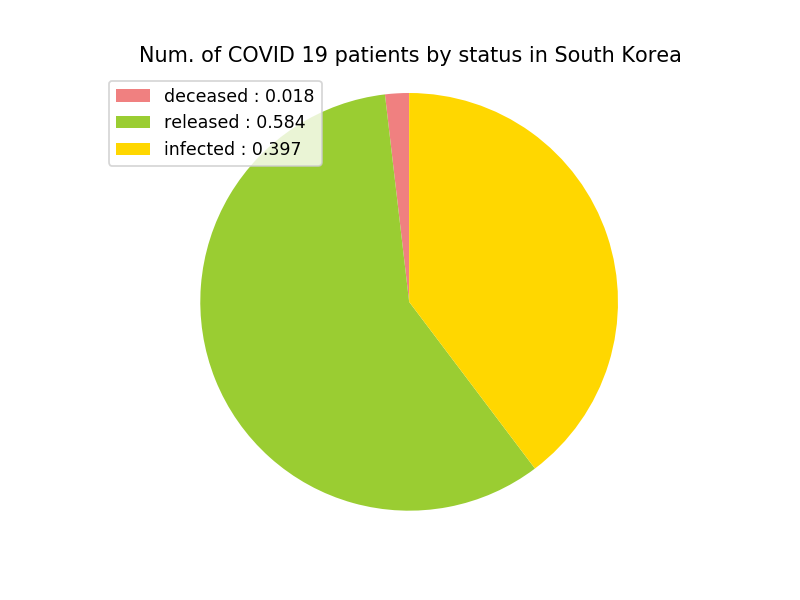

In [27]:
# The slices will be ordered and plotted counter-clockwise.
type_of_patient_status = ['deceased', 'released', 'infected']

num_of_patient_status = [deceased, released, infected]
sum_of_patient = deceased + released + infected
ratio_of_patient_status = []

for i in range(len(num_of_patient_status)):
    ratio_of_patient_status.append(num_of_patient_status[i] / sum_of_patient)

for i in range(len(ratio_of_patient_status)):
    type_of_patient_status[i] = type_of_patient_status[i] + " : {0:0.3f}".format(ratio_of_patient_status[i])

colors = ['lightcoral', 'yellowgreen', 'gold']

patches, texts = plt.pie(ratio_of_patient_status, colors=colors, startangle=90)

plt.legend(patches, type_of_patient_status, loc="best")
plt.axis('equal')
plt.title("Num. of COVID 19 patients by status in South Korea")
plt.show()

#### 나이대별 확진자 수

In [28]:
# 나이대별 확진자의 수

age000 = 0
age010 = 0
age020 = 0
age030 = 0
age040 = 0
age050 = 0
age060 = 0
age070 = 0
age080 = 0
age090 = 0
age100 = 0
unknown_age = 0

for i in range(len(raw_)):
    # birth_year: 3
    # age: 4
    age_data = raw_[i][3]
    if(age_data == '' or age_data == ' '):
        unknown_age = unknown_age + 1
    else:
        age_of_patient = 2020 - int(age_data)

        if(0 <= age_of_patient < 10):
            age000 = age000 + 1
        elif(10 <= age_of_patient < 20):
            age010 = age010 + 1
        elif(20 <= age_of_patient < 30):
            age020 = age020 + 1
        elif(30 <= age_of_patient < 40):
            age030 = age030 + 1
        elif(40 <= age_of_patient < 50):
            age040 = age040 + 1
        elif(50 <= age_of_patient < 60):
            age050 = age050 + 1
        elif(60 <= age_of_patient < 70):
            age060 = age060 + 1
        elif(70 <= age_of_patient < 80):
            age070 = age070 + 1
        elif(80 <= age_of_patient < 90):
            age080 = age080 + 1
        elif(90 <= age_of_patient < 100):
            age090 = age100 + 1
        else:
            age100 = age100 + 1
            
print("어린이 확진자 : " + str(age000))
print("10대 확진자 : " + str(age010))
print("20대 확진자 : " + str(age020))
print("30대 확진자 : " + str(age030))
print("40대 확진자 : " + str(age040))
print("50대 확진자 : " + str(age050))
print("60대 확진자 : " + str(age060))
print("70대 확진자 : " + str(age070))
print("80대 확진자 : " + str(age080))
print("90대 확진자 : " + str(age090))
print("100세 이상 확진자 : " + str(age100))
print("나이 미상 확진자 : " + str(unknown_age))

어린이 확진자 : 59
10대 확진자 : 166
20대 확진자 : 794
30대 확진자 : 434
40대 확진자 : 447
50대 확진자 : 599
60대 확진자 : 381
70대 확진자 : 196
80대 확진자 : 145
90대 확진자 : 3
100세 이상 확진자 : 2
나이 미상 확진자 : 738


<IPython.core.display.Javascript object>


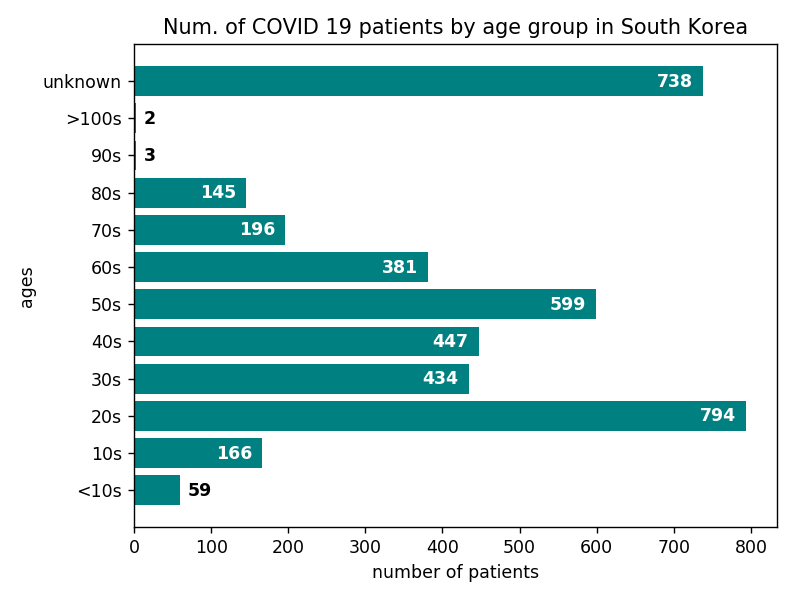

In [29]:
# draw bar chart
type_of_age = ['<10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>100s', 'unknown']
patient_age = [age000, age010, age020, age030, age040, age050, age060, age070, age080, age090, age100, unknown_age]

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='teal')
plt.ylabel("ages")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients by age group in South Korea")

plt.yticks(y_pos, type_of_age)

plt.tight_layout()

for i, v in enumerate(patient_age):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -10
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')

plt.show()

In [31]:
ratio_of_10s = age010 / sum(patient_age)
print("전체 확진자 중 10대의 비율 : " + str(ratio_of_10s * 100) + "%")

전체 확진자 중 10대의 비율 : 4.187689202825428%


### 개학이 10대의 코로나 감염에 미치는 영향

 - 개학일을 기준으로 확인  
 - 고3부터 개학을 시작했으며 이에 따른 유동인구 증가 (학생을 데려다주거나 등등)에 따른 영향  
 - 또 개학을 한다는 것은 상대적으로 안전해졌다는 것을 의미하여 활동 인구의 증가에 따른 영향이 있을 것으로 사료됨  
 - 고3 기준 개학일은 4월 20일  

In [35]:
# 감염 날짜에 따른 10대 확진자 확인
data_of_10s_patient_in_date_before_starting_school = []
data_of_10s_patient_in_date_after_starting_school = []
num_of_ex10s_patient_before_starting_school = 0
num_of_ex10s_patient_after_starting_school = 0

for i in range(len(raw_)):
    trg_data = raw_[i]
    
    # confirm_date: 14
    date = trg_data[14] 
    
    # birth_year: 3
    # age: 4
    age_data = trg_data[3]
    age_of_patient = 0
    
    if(age_data != '' and age_data != ' '):
        age_of_patient = 2020 - int(age_data)
    
    if(age_of_patient >= 10 and age_of_patient < 20):
        if(date >= "2020-04-20"):
            data_of_10s_patient_in_date_after_starting_school.append(trg_data)
        elif(date < "2020-04-20"):
            data_of_10s_patient_in_date_before_starting_school.append(trg_data)
    else:
        if(date >= "2020-04-20"):
            num_of_ex10s_patient_after_starting_school = num_of_ex10s_patient_after_starting_school + 1
        elif(date < "2020-04-20"):
            num_of_ex10s_patient_before_starting_school = num_of_ex10s_patient_before_starting_school + 1
            
#pprint.pprint(data_of_10s_patient_in_date_after_starting_school[:5])
#pprint.pprint(data_of_10s_patient_in_date_before_starting_school[:5])

print("개학 이후 10대 확진자 수 : " + str(len(data_of_10s_patient_in_date_after_starting_school)))
print("개학 이전 10대 확진자 수 : " + str(len(data_of_10s_patient_in_date_before_starting_school)))
print("개학 이후 10대 제외 확진자 수 : " + str(num_of_ex10s_patient_after_starting_school))
print("개학 이전 10대 제외 확진자 수 : " + str(num_of_ex10s_patient_before_starting_school))

print("개학 이후 10대 확진자 수 비율 : " + str(len(data_of_10s_patient_in_date_after_starting_school)
                                            / (len(data_of_10s_patient_in_date_after_starting_school)
                                               + num_of_ex10s_patient_after_starting_school) * 100))
print("개학 이전 10대 확진자 수 비율 : " + str(len(data_of_10s_patient_in_date_before_starting_school)
                                            / (len(data_of_10s_patient_in_date_before_starting_school)
                                               + num_of_ex10s_patient_before_starting_school) * 100))

개학 이후 10대 확진자 수 : 36
개학 이전 10대 확진자 수 : 130
개학 이후 10대 제외 확진자 수 : 630
개학 이전 10대 제외 확진자 수 : 3208
개학 이후 10대 확진자 수 비율 : 5.405405405405405
개학 이전 10대 확진자 수 비율 : 3.894547633313361


<IPython.core.display.Javascript object>


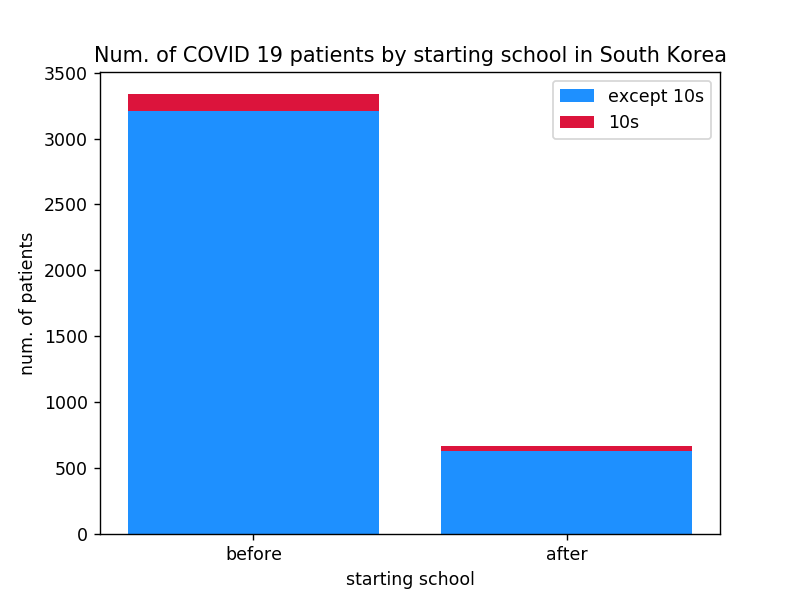

In [36]:
x_axis_text = ['before', 'after']

ex10s_patient_list = [num_of_ex10s_patient_before_starting_school, 
                      num_of_ex10s_patient_after_starting_school]
patient_10s_list = [len(data_of_10s_patient_in_date_before_starting_school), 
                    len(data_of_10s_patient_in_date_after_starting_school)]

plt.xticks([0, 1], x_axis_text)

plt.bar(range(len(ex10s_patient_list)), ex10s_patient_list, color='dodgerblue') 
plt.bar(range(len(patient_10s_list)), patient_10s_list, bottom=ex10s_patient_list, color='crimson')

plt.title("Num. of COVID 19 patients by starting school in South Korea")
plt.ylabel("num. of patients")
plt.xlabel("starting school")
plt.legend(['except 10s', '10s'])

plt.show()

#### 개학 전 후 10대 확진자들의 감염 원인

In [48]:
# 개학 전 10대 확진자의 감염 원인
data_of_10s_patient_in_date_before_starting_school
infection_case_of_10s_patient_in_date_before_starting_school = []

for i in data_of_10s_patient_in_date_before_starting_school:
    # infection case : 9
    tmp_infection_case = i[9]
    if tmp_infection_case in infection_case_of_10s_patient_in_date_before_starting_school:
        pass
    else:
        infection_case_of_10s_patient_in_date_before_starting_school.append(tmp_infection_case)

# 개학 후 10대 확진자의 감염 원인
data_of_10s_patient_in_date_after_starting_school
infection_case_of_10s_patient_in_date_after_starting_school = []

for i in data_of_10s_patient_in_date_after_starting_school:
    # infection case : 9
    tmp_infection_case = i[9]
    if tmp_infection_case in infection_case_of_10s_patient_in_date_after_starting_school:
        pass
    else:
        infection_case_of_10s_patient_in_date_after_starting_school.append(tmp_infection_case)

In [49]:
infection_case_of_10s_patient_in_date_before_starting_school

['Seongdong-gu APT',
 'contact with patient',
 'etc',
 'Dongan Church',
 'Guro-gu Call Center',
 'overseas inflow',
 'Onchun Church',
 'Shincheonji Church',
 '',
 'Changnyeong Coin Karaoke']

In [50]:
infection_case_of_10s_patient_in_date_after_starting_school

['etc', 'contact with patient', 'overseas inflow', 'Coupang Logistics Center']

In [51]:
# 개학 전 10대 확진자의 감염 원인 수 확인
num_infection_case_of_10s_patient_in_date_before_starting_school = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in data_of_10s_patient_in_date_before_starting_school:
    # infection case : 9
    tmp_infection_case = i[9]
    for j in range(len(infection_case_of_10s_patient_in_date_before_starting_school)):
        if(infection_case_of_10s_patient_in_date_before_starting_school[j] == tmp_infection_case):
            num_infection_case_of_10s_patient_in_date_before_starting_school[j] = num_infection_case_of_10s_patient_in_date_before_starting_school[j] + 1
        
            
# 개학 후 10대 확진자의 감염 원인 수 확인
num_infection_case_of_10s_patient_in_date_after_starting_school = [0, 0, 0, 0]

for i in data_of_10s_patient_in_date_after_starting_school:
    # infection case : 9
    tmp_infection_case = i[9]
    for j in range(len(infection_case_of_10s_patient_in_date_after_starting_school)):
        if(infection_case_of_10s_patient_in_date_after_starting_school[j] == tmp_infection_case):
            num_infection_case_of_10s_patient_in_date_after_starting_school[j] = num_infection_case_of_10s_patient_in_date_after_starting_school[j] + 1

<IPython.core.display.Javascript object>


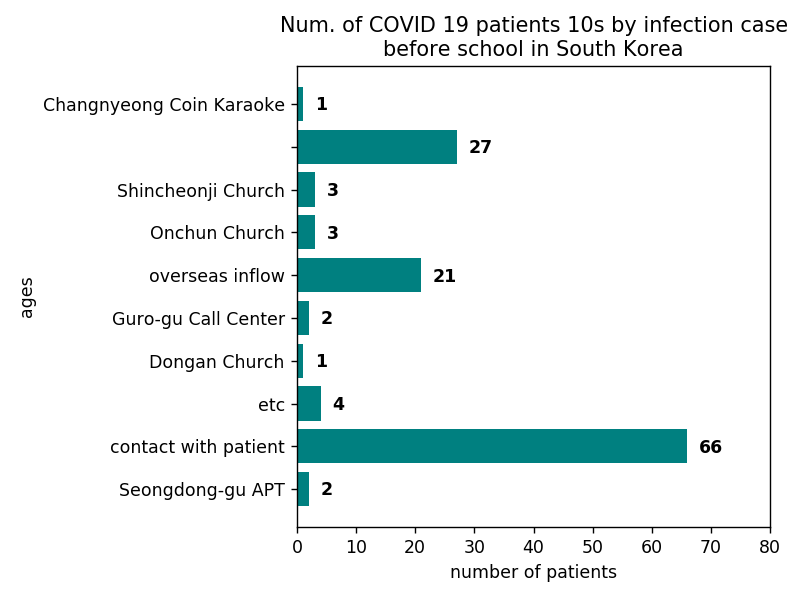

In [63]:
# 개학 전 10대 확진자의 감염 원인 수 확인 그래프
# draw bar chart
type_of_age = infection_case_of_10s_patient_in_date_before_starting_school
patient_age = num_infection_case_of_10s_patient_in_date_before_starting_school

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='teal')
plt.ylabel("ages")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients 10s by infection case" + "\n" + "before school in South Korea")

plt.yticks(y_pos, type_of_age)
plt.xlim([0, 80])

plt.tight_layout()

for i, v in enumerate(patient_age):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -2
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')

plt.show()

<IPython.core.display.Javascript object>


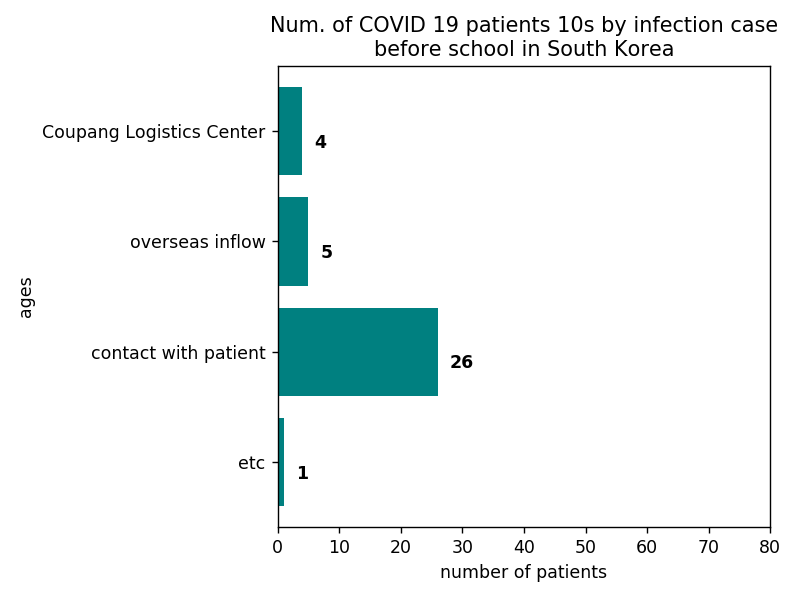

In [64]:
# 개학 후 10대 확진자의 감염 원인 수 확인 그래프
# draw bar chart
type_of_age = infection_case_of_10s_patient_in_date_after_starting_school
patient_age = num_infection_case_of_10s_patient_in_date_after_starting_school

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='teal')
plt.ylabel("ages")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients 10s by infection case" + "\n" + "before school in South Korea")

plt.yticks(y_pos, type_of_age)
plt.xlim([0, 80])

plt.tight_layout()

for i, v in enumerate(patient_age):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -2
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')

plt.show()